In [6]:
suppressMessages({
  library(clusterProfiler)
  library(org.Hs.eg.db)
  library(DOSE)
  library(AnnotationHub)
  library('pheatmap')
  library("DOSE")
  library("enrichplot")
  library("ggupset")
  library("ggplot2")
    library("genekitr")
    library(dplyr)
    library("GOplot")
    
})

# Perform GSEA

In [7]:
perform_gsea <- function(gene_down_in_up_loops, gene_back, OrgDb = org.Hs.eg.db, ont = "ALL", keyType = "ENTREZID", qvalueCutoff = 0.05, cutoff = 0.65, by = "p.adjust", select_fun = min, measure = "Wang") {
  gsea_down_in_up_loops <- enrichGO(gene_down_in_up_loops$ENTREZID, 
                                    OrgDb = OrgDb, 
                                    universe = gene_back$ENTREZID,                     
                                    ont = ont,
                                    keyType = keyType,                     
                                    qvalueCutoff = qvalueCutoff,
                                    readable = TRUE)
  
  if (is.null(gsea_down_in_up_loops) || nrow(gsea_down_in_up_loops@result) == 0) {
    stop("enrichGO did not return any results.")
  }
  
  simplified_gsea_down_in_up_loops <- simplify(gsea_down_in_up_loops, 
                                               cutoff = cutoff, 
                                               by = by, 
                                               select_fun = select_fun, 
                                               measure = measure)
  
  if (is.null(simplified_gsea_down_in_up_loops) || nrow(simplified_gsea_down_in_up_loops@result) == 0) {
    stop("simplify did not return any results.")
  }
  
  simplified_gsea_down_in_up_loops_pairs <- pairwise_termsim(simplified_gsea_down_in_up_loops)
  
  return(list(
    gsea_results = gsea_down_in_up_loops,
    simplified_results = simplified_gsea_down_in_up_loops,
    pairwise_similarity = simplified_gsea_down_in_up_loops_pairs
  ))
}

create_treeplot_main <- function(simplified_gsea_down_in_up_loops_pairs, output_file, showCategory = 20, color = "p.adjust", fontsize = 4, geneClusterPanel = "dotplot", width = 14, height = 9, dpi = 700) {
  p1 <- treeplot(simplified_gsea_down_in_up_loops_pairs, 
                 showCategory = showCategory, 
                 color = color, 
                 offset.params = list(bar_tree = rel(2), tiplab = rel(1), hexpand = 0.6),
                 fontsize = fontsize, 
                 geneClusterPanel = geneClusterPanel)
  
  p1$layers[[7]]$aes_params$size <- 4
  
  p1 <- p1 + theme_void() +
    theme(
      text = element_text(family = "Helvetica"),
      plot.title = element_text(family = "Helvetica"),
      legend.text = element_text(family = "Helvetica"),
      plot.margin = unit(c(1, 1, 1, 1), "cm"),
      panel.background = element_rect(fill = "white", color = NA),
      plot.background = element_rect(fill = "white", color = NA)
    ) +
    coord_cartesian(clip = "off")

  ggsave(output_file, plot = p1, width = width, height = height, device = 'pdf', dpi = dpi)
  return(p1)
}

In [8]:
path_to_data = '/tank/projects/diana_hic/cultures_vs_postmortem/cultures_code/2_tads//tads_borders_data/'
genes_in_down_pm <- read.csv(file.path(path_to_data, "genes_in_down_in_post_mortem_tads_borders.csv"))
genes_in_up_pm <- read.csv(file.path(path_to_data,  "genes_in_up_in_post_mortem_tads_borders.csv"))
gene_back <- read.csv(file.path(path_to_data,  "genes_in_all_presence_tads_borders.csv"))

gene_list <- genes_in_down_pm$gene_name_anno
genes_in_down_pm <- bitr(gene_list, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db)

gene_list <- genes_in_up_pm$gene_name_anno
genes_in_up_pm <- bitr(gene_list, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db)

gene_list <- gene_back$gene_name_anno
gene_back <- bitr(gene_list, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db)


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(gene_list, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“23.31% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(gene_list, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“22.26% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

Warning message in bitr(gene_list, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“25% of input gene IDs are fail to map...”


In [5]:
### no enrichment
gsea_up_tads <- perform_gsea(genes_in_up_pm, gene_back, cutoff = 0.7)
create_treeplot_main(gsea_up_tads$pairwise_similarity, "./tads_visualizations/tads_borders_gsea_up_tads_borders.pdf")


ERROR: Error in perform_gsea(genes_in_up_pm, gene_back, cutoff = 0.7): enrichGO did not return any results.


! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Invaild edge matrix for <phylo>. A <tbl_df> is returned.

! # Inva

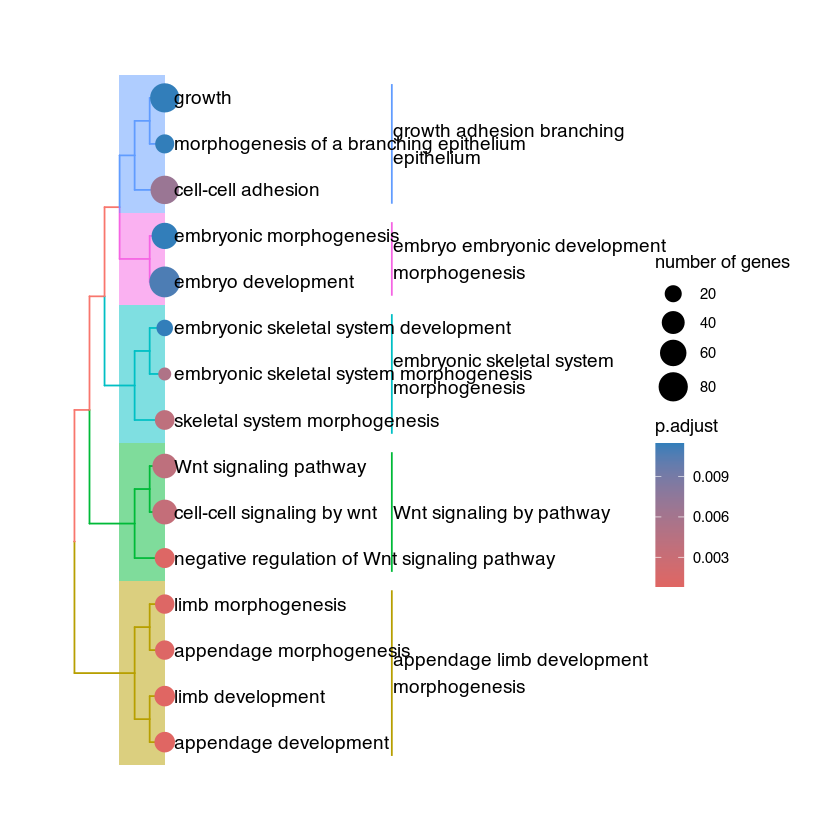

In [9]:
gsea_down_tads <- perform_gsea(genes_in_down_pm, gene_back, cutoff = 0.8)
create_treeplot_main(gsea_down_tads$pairwise_similarity, "./tads_visualizations/tads_borders_gsea_down_tads_borders.pdf", height=4.3, showCategory=15)


In [11]:
write.csv(genes_in_down_pm, "./saved_data/fig3_f_case_genes_in_down_pm_tads.csv", row.names = FALSE)
write.csv(gene_back, "./saved_data/fig3_f_background_gene_back.csv", row.names = FALSE)